In [1]:
import pandas as pd
import sys
sys.path.append("../Handlers")
import traintest

In [2]:
ling = pd.read_csv("./ling.csv")

In [3]:
subject = "subject"
body = "body"
ling_input = ling.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)

In [4]:
cnn = traintest.ConvolutionalNNClassifier("LingSpam")
cnn.load_data(ling_input, ling["label"])
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()

["job posting - apple-iss research center content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical 

<tf.Tensor: shape=(2287, 200), dtype=int64, numpy=
array([[  15,    9,   57, ..., 1210,   24,    1],
       [  32,   36,  330, ...,   97,    5,  326],
       [  93, 4976,   54, ...,    0,    0,    0],
       ...,
       [1974,  331,  945, ...,    5, 1236,    1],
       [ 267,  140,    1, ...,   16, 3956,  711],
       [ 267,   28,  701, ...,   32,   29, 1131]], dtype=int64)>

In [5]:
cnn.build(
    dense_dropout=True, 
    dense_dropout_rate=0.4, 
    epochs=20,
    conv_layer_num=2,
    num_filters=[128, 64],
    filter_sizes=[5, 3],
    max_pooling=True,
    pooling_sizes=[2, 0]
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7779 - loss: 0.5103 - precision: 0.2185 - recall: 0.1044 - val_accuracy: 0.8566 - val_loss: 0.2127 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9071 - loss: 0.1732 - precision: 0.8275 - recall: 0.4583 - val_accuracy: 0.9930 - val_loss: 0.0640 - val_precision: 1.0000 - val_recall: 0.9512
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9941 - loss: 0.0219 - precision: 0.9762 - recall: 0.9884 - val_accuracy: 0.9930 - val_loss: 0.0505 - val_precision: 1.0000 - val_recall: 0.9512
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9994 - loss: 0.0033 - precision: 0.9994 - recall: 0.9970 - val_accuracy: 0.9930 - val_loss: 0.0566 - val_precision: 1.0000 - val_recall: 0.9512
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 1.0000 - loss: 8.8083e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9930 - val_loss: 0.0618

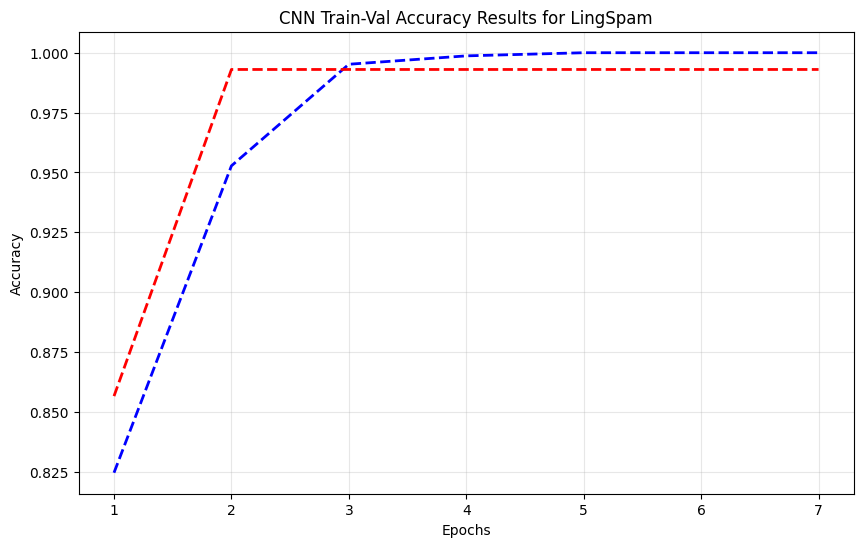

In [6]:
cnn.plot_training_validation_accuracy()

In [7]:
metrics = cnn.evaluate()
print(metrics)
del cnn

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
{'dataset': 'LingSpam', 'model': 'CNN', 'metrics': {'accuracy': 0.993006993006993, 'weighted_precision': 0.9930638467223832, 'wighted_recall': 0.993006993006993, 'weighted_f1': 0.9929359838767505, 'macro_precision': 0.9959349593495934, 'macro_recall': 0.9761904761904762, 'macro_f1': 0.9857640617222498, 'roc_auc': 0.9761904761904762}, 'confusion_matrix': array([[244,   0],
       [  2,  40]], dtype=int64), 'epochs': 7}


In [8]:
rnn = traintest.RecurrentNNClassifier("LingSpam")
rnn.load_data(ling_input, ling["label"])
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()

["job posting - apple-iss research center content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical 

<tf.Tensor: shape=(2287, 200), dtype=int64, numpy=
array([[  15,    9,   57, ..., 1210,   24,    1],
       [  32,   36,  330, ...,   97,    5,  326],
       [  93, 4976,   54, ...,    0,    0,    0],
       ...,
       [1974,  331,  945, ...,    5, 1236,    1],
       [ 267,  140,    1, ...,   16, 3956,  711],
       [ 267,   28,  701, ...,   32,   29, 1131]], dtype=int64)>

In [9]:
rnn.build(
    hidden_layer_num=2,
    hidden_sizes=[128, 64],
    epochs=20,
    lstm=False
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.8262 - loss: 0.5225 - precision: 0.1818 - recall: 0.0325 - val_accuracy: 0.8566 - val_loss: 0.3754 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - accuracy: 0.8275 - loss: 0.3776 - precision: 0.3142 - recall: 0.0684 - val_accuracy: 0.8566 - val_loss: 0.2866 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.8721 - loss: 0.2568 - precision: 0.6043 - recall: 0.1186 - val_accuracy: 0.9301 - val_loss: 0.1876 - val_precision: 1.0000 - val_recall: 0.5122
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.9089 - loss: 0.2107 - precision: 0.8483 - recall: 0.5734 - val_accuracy: 0.9860 - val_loss: 0.0512 - val_precision: 0.9512 - val_recall: 0.9512
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.9924 - loss: 0.0289 - precision: 0.9801 - recall: 0.9720 - val_accuracy: 0.9860 - va

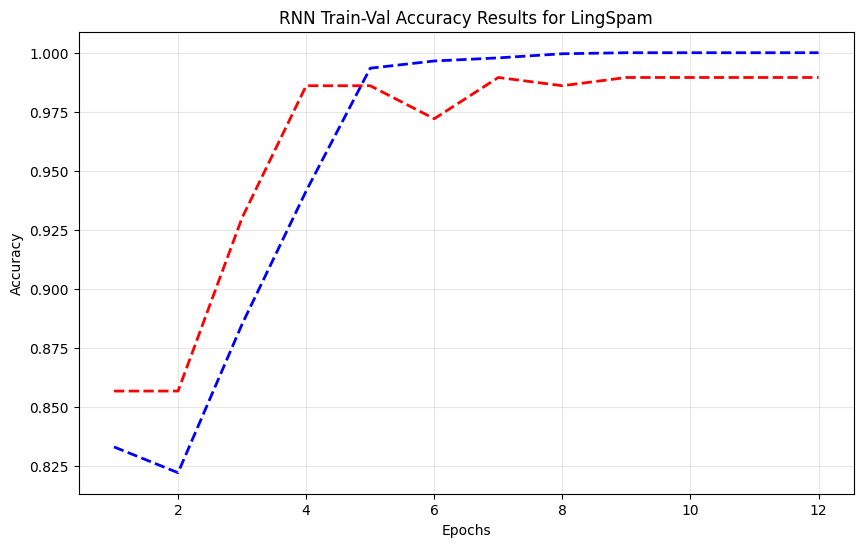

In [10]:
rnn.plot_training_validation_accuracy()

In [11]:
metrics = rnn.evaluate()
print(metrics)
del rnn

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
{'dataset': 'LingSpam', 'model': 'RNN', 'metrics': {'accuracy': 0.972027972027972, 'weighted_precision': 0.9716456307919722, 'wighted_recall': 0.972027972027972, 'weighted_f1': 0.9717439355070018, 'macro_precision': 0.9523373983739838, 'macro_recall': 0.934328649492584, 'macro_f1': 0.9430562468889996, 'roc_auc': 0.9343286494925839}, 'confusion_matrix': array([[241,   3],
       [  5,  37]], dtype=int64), 'epochs': 12}


In [12]:
ann = traintest.ArtificialNNClassifier("LingSpam")
ann.load_data(ling_input, ling["label"])
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()

["job posting - apple-iss research center content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical 

<tf.Tensor: shape=(2287, 200), dtype=int64, numpy=
array([[  15,    9,   57, ..., 1210,   24,    1],
       [  32,   36,  330, ...,   97,    5,  326],
       [  93, 4976,   54, ...,    0,    0,    0],
       ...,
       [1974,  331,  945, ...,    5, 1236,    1],
       [ 267,  140,    1, ...,   16, 3956,  711],
       [ 267,   28,  701, ...,   32,   29, 1131]], dtype=int64)>

In [13]:
ann.build(
    hidden_layer_num=2,
    hidden_layer_sizes=[64, 64],
    epochs=20
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7922 - loss: 0.5711 - precision: 0.1562 - recall: 0.0727 - val_accuracy: 0.8566 - val_loss: 0.3160 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8660 - loss: 0.2610 - precision: 0.6811 - recall: 0.2221 - val_accuracy: 0.9895 - val_loss: 0.0755 - val_precision: 0.9524 - val_recall: 0.9756
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9940 - loss: 0.0433 - precision: 0.9821 - recall: 0.9830 - val_accuracy: 0.9930 - val_loss: 0.0358 - val_precision: 0.9756 - val_recall: 0.9756
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9985 - loss: 0.0093 - precision: 0.9939 - recall: 0.9976 - val_accuracy: 0.9930 - val_loss: 0.0311 - val_precision: 0.9756 - val_recall: 0.9756
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9994 - loss: 0.0042 - precision: 1.0000 - recall: 0.9968 - val_accuracy: 0.9965 - val_loss:

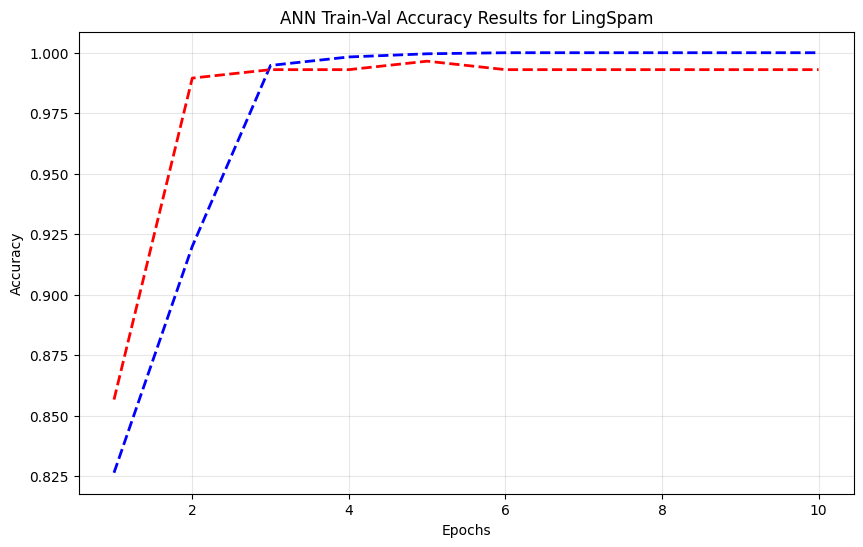

In [14]:
ann.plot_training_validation_accuracy()

In [15]:
metrics = ann.evaluate()
print(metrics)
del ann

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
{'dataset': 'LingSpam', 'model': 'ANN', 'metrics': {'accuracy': 0.9965034965034965, 'weighted_precision': 0.9965177679463395, 'wighted_recall': 0.9965034965034965, 'weighted_f1': 0.9964860083863704, 'macro_precision': 0.9979591836734694, 'macro_recall': 0.9880952380952381, 'macro_f1': 0.9929534087269323, 'roc_auc': 0.9880952380952381}, 'confusion_matrix': array([[244,   0],
       [  1,  41]], dtype=int64), 'epochs': 10}
